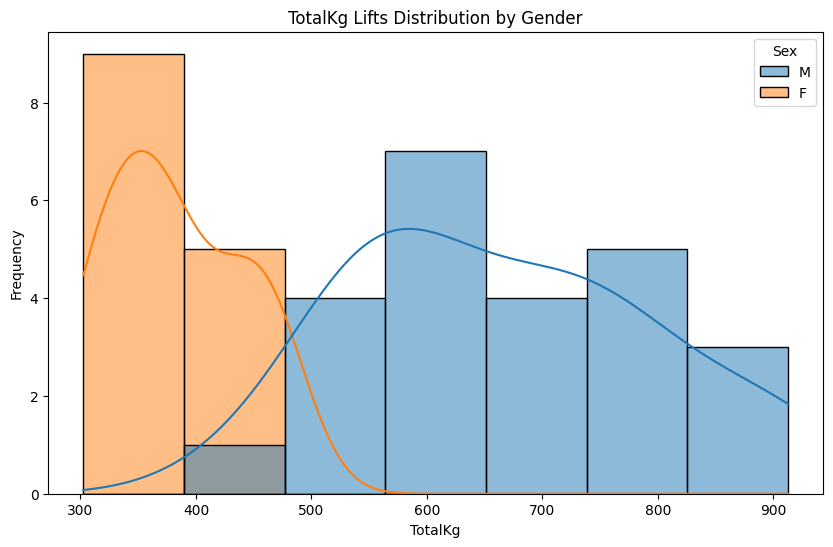

2024-02-28 18:56:55.292 
  command:

    streamlit run C:\Users\rikua\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import streamlit as st

# Load the dataset
df = pd.read_csv("C:\\Users\\rikua\\openpowerlifting-2023-08-12-9f1b3427.csv", low_memory=False)
df.head()

# Data filtering 

filtered_df = df[(df['Event'] == 'SBD') & (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')]

# Perform statistical analysis based on gender
men = filtered_df[filtered_df['Sex'] == 'M']['TotalKg']
women = filtered_df[filtered_df['Sex'] == 'F']['TotalKg']

# T_stat stands for difference between the means of two groups relative to the variance of data
# P_value stores the calculated value, which indicates the probability of observing the given results under the null hypothesis.
# if the p-value is is greater than the significance level, indicating that there is no significant difference between the means of two groups (male, female)
t_stat, p_value = stats.ttest_ind(men, women)

# Visualize sample data distributions

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='TotalKg', hue='Sex', kde=True) #KDE = Kernel density estimation, it calculates the probability density function of a random variable
plt.title('TotalKg Lifts Distribution by Gender')
plt.xlabel('TotalKg')
plt.ylabel('Frequency')
plt.show()

# Streamlit components for displaying analysis results
st.title('Analysis results:')
st.write("Hypothesis: Men lift more than women")
st.write(f"T-statistic: {t_stat}")
st.write(f"P-value: {p_value}")

if p_value < 0.05:
    st.write("Result: There is a significant difference in lifting results. Reject the null hypothesis.")
else:
    st.write("Result: There is no significant difference between men and women lifting results. Fail to reject the null hypothesis.")
